<a href="https://colab.research.google.com/github/Tauseef2707/OIBSIP/blob/main/Unemployment%20Analysis%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving Unemployment in India.csv to Unemployment in India.csv


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
print(df.isnull().sum())


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [5]:
df = df.dropna()
print("Missing values removed!")


Missing values removed!


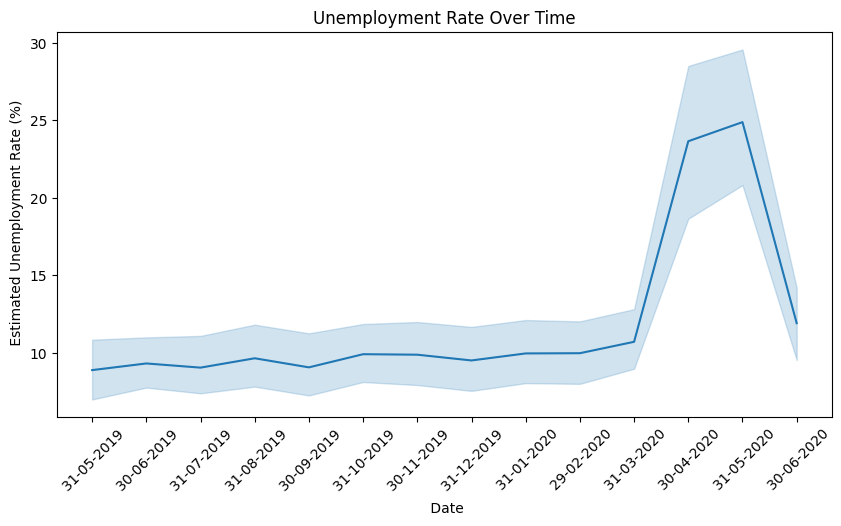

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate Over Time")
plt.xticks(rotation=45)
plt.show()


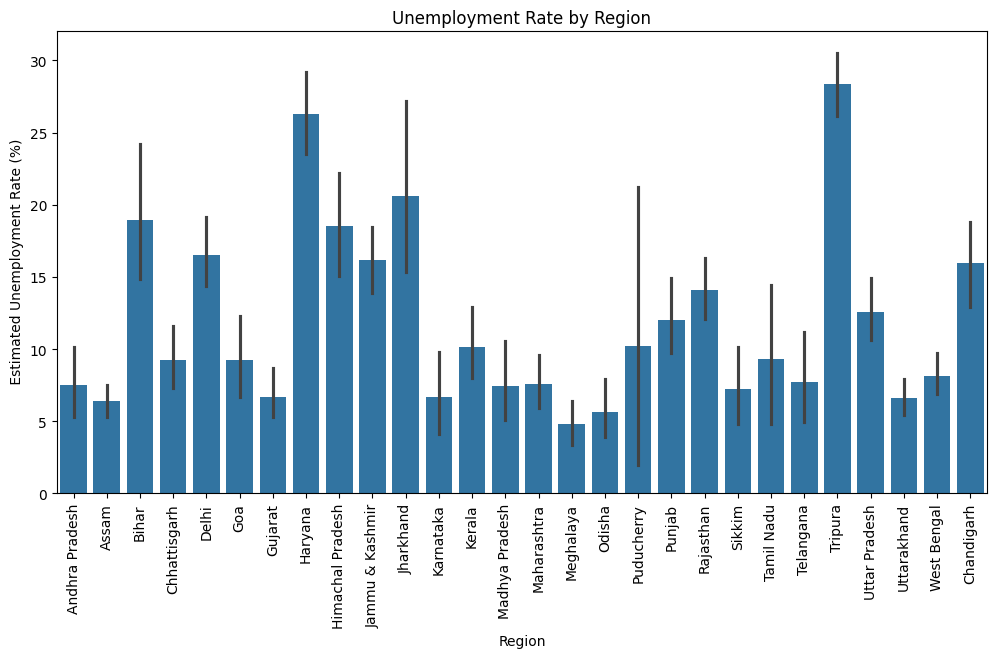

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate by Region")
plt.xticks(rotation=90)
plt.show()


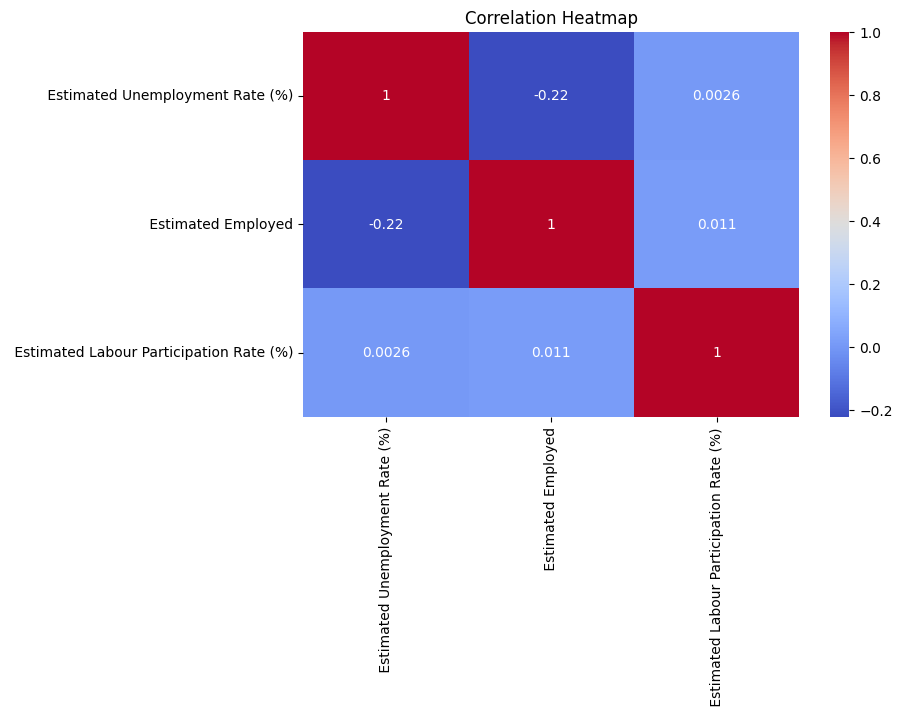

In [10]:
numeric_df = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
X = df[[' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
y = df[' Estimated Unemployment Rate (%)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Trained Successfully!")
print("R2 Score:", model.score(X_test, y_test))

# Sample prediction
sample = X_test.iloc[0:1]
pred_value = model.predict(sample)

print("Predicted Unemployment Rate:", pred_value[0])


Model Trained Successfully!
R2 Score: 0.03938840314253944
Predicted Unemployment Rate: 13.405464475589577
